In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.losses import binary_crossentropy

In [2]:
file = np.load(r"C:\Users\Manthan\Desktop\jupyter_extension_prettier\vs_code_extension\Image_Classification\mnist_compressed.npz")
print(list(file.keys()))

['train_images', 'train_labels', 'test_images', 'test_labels']


In [14]:
X_test, y_test, X_train, y_train =  file['test_images'], file['test_labels'], file['train_images'], file['train_labels']

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

print(len(np.unique(y_train)))

(60000, 28, 56)
(60000,)
(10000, 28, 56)
(10000,)
100


In [15]:
X_test = X_test / 255.0
X_train = X_train / 255.0

X_test = X_test[..., np.newaxis]
X_train = X_train[..., np.newaxis]

model_layers = [
    tf.keras.layers.Conv2D(4, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
]

# each layer outputs ( batch_size, height, width, num_features)
# batch_size: Number of images processed together (first dimension).
# height: Height of the feature map.
# width: Width of the feature map.
# num_features: Number of filters in the layer (channels).

In [24]:
def visualize_cnn (layers, input_img):
    feature_maps = [input_img]
    for layer in layers:
        feature_maps.append(layer(feature_maps[-1]))

    for i, f_maps in enumerate(feature_maps[1:], start=1):          # skip i/p img
        num_features = f_maps.shape[-1]                             # select nested tuple.shape 
        fig, axes = plt.subplots(1, num_features, figsize=(15,5))
        fig.suptitle(f"Feature map of Layer: {i}", fontsize=16)
        for j in range(num_features):
            axes[j].imshow(f_maps[0, :, :, j], cmap="viridis")        # 1 image so '0' while plotting ht,wd for each j filter
            axes[j].axis("off")
        plt.show()

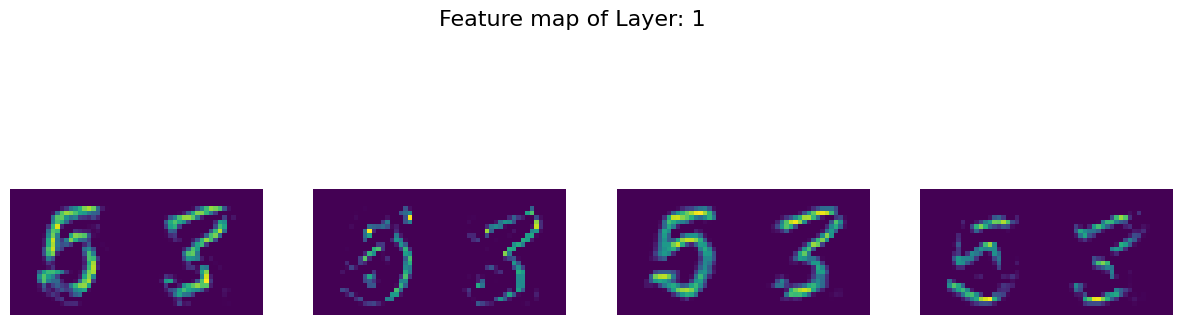

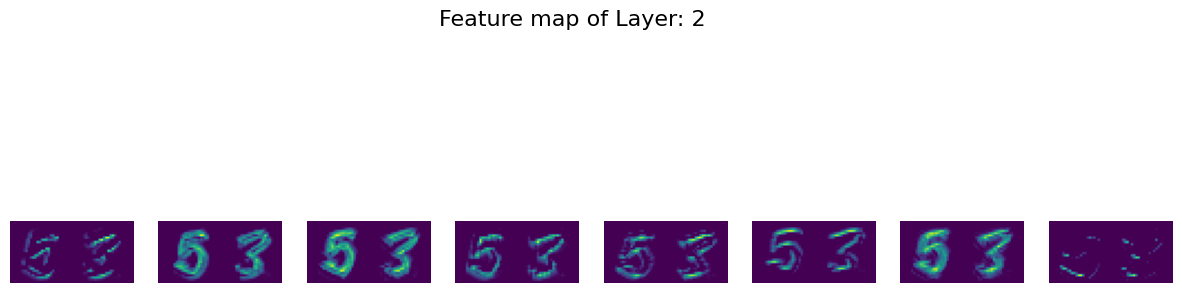

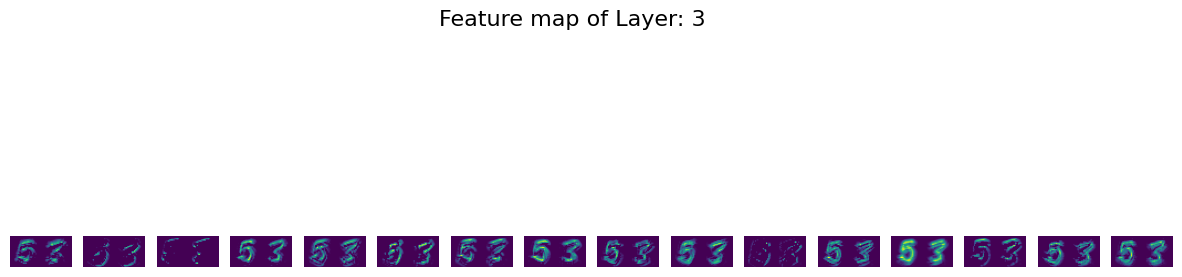

In [25]:
test_image = X_test[0:1]  # select array of 1 img only
visualize_cnn(model_layers, test_image)